# その他

## path関連

## glob

In [1]:
# globのインポート
from glob import glob

#その他のライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#引数のパターンにマッチするファイルパスのリストを取得
# * : ワイルドカード(0文字以上の任意の文字列)
glob('*')

['OpenCV.ipynb',
 'Seaborn.ipynb',
 'その他.ipynb',
 'sample_dict.npy',
 'Pandas.ipynb',
 'saved_seaborn.png',
 'sample_ndarray.npy',
 'Matplotlib.ipynb',
 'public-covid-data',
 'cropped_lenna_rgb.png',
 'cropped_lenna.png',
 'datasets',
 'NumPy.ipynb',
 'Pythonの基本.ipynb',
 'outputs']

In [4]:
# .pngのみ
glob('*.png')

'saved_seaborn.png'

In [10]:
# public-covid-data以下のフォルダ一覧
glob('public-covid-data/*/*')

['public-covid-data/rp_msk/8.nii.gz',
 'public-covid-data/rp_msk/3.nii.gz',
 'public-covid-data/rp_msk/2.nii.gz',
 'public-covid-data/rp_msk/5.nii.gz',
 'public-covid-data/rp_msk/4.nii.gz',
 'public-covid-data/rp_msk/9.nii.gz',
 'public-covid-data/rp_msk/1.nii.gz',
 'public-covid-data/rp_msk/6.nii.gz',
 'public-covid-data/rp_msk/7.nii.gz',
 'public-covid-data/rp_im/8.nii.gz',
 'public-covid-data/rp_im/3.nii.gz',
 'public-covid-data/rp_im/2.nii.gz',
 'public-covid-data/rp_im/5.nii.gz',
 'public-covid-data/rp_im/4.nii.gz',
 'public-covid-data/rp_im/9.nii.gz',
 'public-covid-data/rp_im/1.nii.gz',
 'public-covid-data/rp_im/6.nii.gz',
 'public-covid-data/rp_im/7.nii.gz']

In [12]:
# 5~9で始まるファイルのみ
glob('public-covid-data/rp_im/[5-9]*')

['public-covid-data/rp_im/8.nii.gz',
 'public-covid-data/rp_im/5.nii.gz',
 'public-covid-data/rp_im/9.nii.gz',
 'public-covid-data/rp_im/6.nii.gz',
 'public-covid-data/rp_im/7.nii.gz']

## os モジュールと pathlib モジュール

In [17]:
# os モジュールと pathlib.Pathのインポート
import os
from pathlib import Path

In [20]:
#pathのインスタンス作成
p = Path('public-covid-data')

In [21]:
p

PosixPath('public-covid-data')

In [27]:
list(p.iterdir())

[PosixPath('public-covid-data/rp_msk'), PosixPath('public-covid-data/rp_im')]

In [32]:
# rp_im以下のpathオブジェクト
sub_p = list(p.iterdir())[1]
list(sub_p.iterdir())


[PosixPath('public-covid-data/rp_im/8.nii.gz'),
 PosixPath('public-covid-data/rp_im/3.nii.gz'),
 PosixPath('public-covid-data/rp_im/2.nii.gz'),
 PosixPath('public-covid-data/rp_im/5.nii.gz'),
 PosixPath('public-covid-data/rp_im/4.nii.gz'),
 PosixPath('public-covid-data/rp_im/9.nii.gz'),
 PosixPath('public-covid-data/rp_im/1.nii.gz'),
 PosixPath('public-covid-data/rp_im/6.nii.gz'),
 PosixPath('public-covid-data/rp_im/7.nii.gz')]

In [33]:
# p.glob()でパターンでマッチングできる
path = list(sub_p.glob('*[6-9]*'))
path

[PosixPath('public-covid-data/rp_im/8.nii.gz'),
 PosixPath('public-covid-data/rp_im/9.nii.gz'),
 PosixPath('public-covid-data/rp_im/6.nii.gz'),
 PosixPath('public-covid-data/rp_im/7.nii.gz')]

In [38]:
target_file

PosixPath('public-covid-data/rp_im/8.nii.gz')

In [37]:
target_file = path[0]
# head(フォルダパス)とtail(ファイル名)にsplit
folder_p, file_name = os.path.split(target_file)
print(folder_p, file_name)

public-covid-data/rp_im 8.nii.gz


In [39]:
# フォルダパスとファイル名を連結させる
new_file_path = os.path.join(folder_p, 'test.txt')
new_file_path

'public-covid-data/rp_im/test.txt'

In [41]:
# フォルダを作成する

# パスの文字列を構成
p = Path('public-covid-data')
new_folder_name = 'new_folder'
new_folder_path = os.path.join(p, new_folder_name)
new_folder_path

'public-covid-data/new_folder'

In [42]:
# すでに存在するか確認
os.path.exists(new_folder_path)

False

In [15]:
# なければ作成
if not os.path.exists(new_folder_path):
    # 指定したフォルダを作成する
    os.makedirs(new_folder_path)

In [43]:
os.makedirs(new_folder_path, exist_ok=True)

## tqdm

In [44]:
# import 
from tqdm import tqdm

In [58]:
# 1秒ほどかかるループ処理
import time
before = time.time()
sum_ = 0
for i in range(int(1e7)):
    sum_ += i
print(sum)
after = time.time()
print('it took: {}'.format(after - before))

49999995000000
it took: 1.0472629070281982


In [60]:
# tqdmの戻り値をそのままfor文で回す
sum = 0
for i in tqdm(range(int(1e7)), position=0):
    sum += i

100%|██████████| 10000000/10000000 [00:02<00:00, 3888614.20it/s]


In [94]:
# データ数が出てこない時はtotal引数を使う
# pubic-covid-data配下のpath情報を格納したDataFrameを作成
# filename(id), im_path, msk_path
p = Path('public-covid-data')
df_list = []
for folder in p.iterdir():
    path_list = [p.as_posix() for p in list(folder.iterdir())]
    file_list = [os.path.split(p)[1] for p in list(folder.iterdir())]
    df_list.append(pd.DataFrame({'path': path_list, 'filename': file_list}))
df = df_list[0].merge(df_list[1], on='filename', suffixes=('_msk', '_im'))    
df

,path_msk,filename,path_im
0,public-covid-data/rp_msk/8.nii.gz,8.nii.gz,public-covid-data/rp_im/8.nii.gz
1,public-covid-data/rp_msk/3.nii.gz,3.nii.gz,public-covid-data/rp_im/3.nii.gz
2,public-covid-data/rp_msk/2.nii.gz,2.nii.gz,public-covid-data/rp_im/2.nii.gz
3,public-covid-data/rp_msk/5.nii.gz,5.nii.gz,public-covid-data/rp_im/5.nii.gz
4,public-covid-data/rp_msk/4.nii.gz,4.nii.gz,public-covid-data/rp_im/4.nii.gz
5,public-covid-data/rp_msk/9.nii.gz,9.nii.gz,public-covid-data/rp_im/9.nii.gz
6,public-covid-data/rp_msk/1.nii.gz,1.nii.gz,public-covid-data/rp_im/1.nii.gz
7,public-covid-data/rp_msk/6.nii.gz,6.nii.gz,public-covid-data/rp_im/6.nii.gz
8,public-covid-data/rp_msk/7.nii.gz,7.nii.gz,public-covid-data/rp_im/7.nii.gz


In [95]:
p = Path('public-covid-data')
for folder in p.iterdir():
    print(folder.iterdir())


<generator object Path.iterdir at 0x7f393e1f1450>
<generator object Path.iterdir at 0x7f393ce17c50>


In [83]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    print('image path for {} is here: {}'.format(row['path_im'], row['filename']))

100%|██████████| 9/9 [00:00<00:00, 1823.17it/s]

image path for public-covid-data/rp_msk/8.nii.gz is here: 8.nii.gz
image path for public-covid-data/rp_msk/3.nii.gz is here: 3.nii.gz
image path for public-covid-data/rp_msk/2.nii.gz is here: 2.nii.gz
image path for public-covid-data/rp_msk/5.nii.gz is here: 5.nii.gz
image path for public-covid-data/rp_msk/4.nii.gz is here: 4.nii.gz
image path for public-covid-data/rp_msk/9.nii.gz is here: 9.nii.gz
image path for public-covid-data/rp_msk/1.nii.gz is here: 1.nii.gz
image path for public-covid-data/rp_msk/6.nii.gz is here: 6.nii.gz
image path for public-covid-data/rp_msk/7.nii.gz is here: 7.nii.gz


## nibabel

In [84]:
# インポート
import nibabel as nib

In [98]:
path = df['path_im'].iloc[1]
# loadしてnumpy arrayを取り出す
def load_nifti(nifti_path):
    im_nifti = nib.load(nifti_path)
    data = im_nifti.get_fdata()
    data = np.transpose(data)
    return data
data = load_nifti(path)
data.shape

(418, 630, 630)

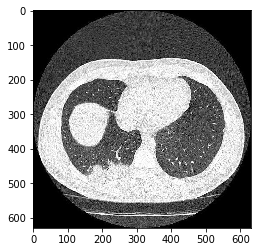

In [105]:
plt.imshow(data[122, :, :], cmap='gray')

In [109]:
msk_path = df['path_msk'].iloc[2]
msk = load_nifti(msk_path)
msk.shape

(39, 630, 630)

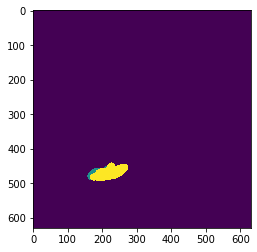

In [112]:
plt.imshow(msk[10, :, :])

In [114]:
np.unique(msk[10, :, :])

array([0., 1., 2.])

In [115]:
# とりあえずslice_numカラムを追加
df['slice_num'] = np.nan #np.nanはfloatなので，slice_numの値は全てfloatになることに注意

In [118]:
df

,path_msk,filename,path_im,slice_num
0,public-covid-data/rp_msk/8.nii.gz,8.nii.gz,public-covid-data/rp_im/8.nii.gz,45.0
1,public-covid-data/rp_msk/3.nii.gz,3.nii.gz,public-covid-data/rp_im/3.nii.gz,418.0
2,public-covid-data/rp_msk/2.nii.gz,2.nii.gz,public-covid-data/rp_im/2.nii.gz,39.0
3,public-covid-data/rp_msk/5.nii.gz,5.nii.gz,public-covid-data/rp_im/5.nii.gz,66.0
4,public-covid-data/rp_msk/4.nii.gz,4.nii.gz,public-covid-data/rp_im/4.nii.gz,39.0
5,public-covid-data/rp_msk/9.nii.gz,9.nii.gz,public-covid-data/rp_im/9.nii.gz,93.0
6,public-covid-data/rp_msk/1.nii.gz,1.nii.gz,public-covid-data/rp_im/1.nii.gz,45.0
7,public-covid-data/rp_msk/6.nii.gz,6.nii.gz,public-covid-data/rp_im/6.nii.gz,42.0
8,public-covid-data/rp_msk/7.nii.gz,7.nii.gz,public-covid-data/rp_im/7.nii.gz,42.0


In [120]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    data = load_nifti(row['path_im'])
    # data shape is (z, h, w)
    slice_num = data.shape[0]
    df.loc[idx, 'slice_num'] = slice_num

100%|██████████| 9/9 [00:04<00:00,  1.82it/s]


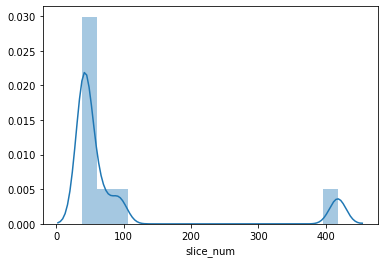

In [123]:
sns.distplot(df['slice_num'])

## multiprocessing

In [124]:
# インポート
from multiprocessing import Pool, cpu_count

### map(func, iterable)

In [126]:
def square(n):
    return n ** 2

params = [1, 2, 3, 4]
# mapの戻り値はイテレータ
list(map(square, params))

[1, 4, 9, 16]

## p.map(func, iterable) とp.imap(func, iterable)

In [128]:
cpu_count()

12

In [133]:
import time
# pインスタンスを作成　（使用するCPUの物理コア数を指定）
p = Pool(processes=cpu_count()-1)

def wait_sec(sec):
    time.sleep(sec)
    return sec ** 2

# p.map()関数で，並列処理
before = time.time()
# p.mapの戻り値はリスト
results = p.map(wait_sec, [1, 5, 3])
after = time.time()
print('it took {} sec'.format(after-before))
# multiprocessを閉じる
p.close()
p.join()
print(results)

it took 5.006199836730957 sec
[1, 25, 9]


In [136]:
# p.imapはイテレータを返す．
p = Pool(processes=cpu_count()-1)
start = time.time()
for i in p.imap(wait_sec, [1, 5, 3, 1]):
# imap_unorderedは処理が終わり次第返す
# for i in p.imap_unordered(wait_sec, [1, 5, 3]):　
    print('{}: {} sec'.format(i, time.time() - start))
p.close()
p.join()

1: 1.0018041133880615 sec
25: 5.006211519241333 sec
9: 5.006397724151611 sec
1: 5.0064756870269775 sec


In [140]:
# p.imapの戻り値はiterableなので，tqdmを使うことも可能
p = Pool(processes=cpu_count()-1)
results = list(tqdm(p.imap(wait_sec, [1, 5, 3]), total=3))
p.close()
p.join()

100%|██████████| 3/3 [00:05<00:00,  1.67s/it]


In [142]:
# 複数の引数を入れる場合はラッパー関数を作る
# ２つの引数をとる関数
def multiply(a, b):
    return a * b

params1 = [1, 2, 3, 4]
params2 = [10, 30, 70, 20]
# ラッパー関数を作る
def wrap_multiply(args):
    # *はunpack演算子
    return multiply(*args)

# zipでタプルのリストを作成 (イテレータを返す)
job_args = list(zip(params1, params2))
print(job_args)
# 並列処理
p = Pool(processes=cpu_count()-1)
results = p.imap(wrap_multiply, job_args)
p.close()
p.join()
list(results)

[(1, 10), (2, 30), (3, 70), (4, 20)]


[10, 60, 210, 80]

## Pythonスクリプトを別ファイルに保存してJupyterで読み込む

In [146]:
# 変更したモジュールが反映されるようにする
# 'autoreload'というextensionをloadする
%load_ext autoreload
#　スクリプトを実行するたびに毎回reloadするように設定
%autoreload 2
import util
from util import multiply

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
util.multiply(3, 4)

Multiplying 3 and 4


12

In [147]:
multiply(3, 4)

12